In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
book_tags = pd.read_csv('book_tags.csv')
to_read = pd.read_csv('to_read.csv')



In [3]:
books.head(2) 

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [4]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [5]:
books.shape  # 10,000 rows and 23 columns

(10000, 23)

In [6]:
len(books.id.unique()) 

10000

In [7]:
books=books.drop(columns=[ "original_title","best_book_id","work_id","books_count","isbn","isbn13","original_publication_year","work_ratings_count","work_text_reviews_count","image_url","small_image_url"])

In [8]:
#quick look at what are the books with the highest average rating

books.sort_values('average_rating', ascending = False).head()

,id,book_id,authors,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
3627,3628,24812,Bill Watterson,The Complete Calvin and Hobbes,eng,4.82,28900,120,154,693,3117,25884
3274,3275,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,317,233,978,3686,28210
861,862,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,154,404,2653,18272,86693
8853,8854,95602,Francine Rivers,Mark of the Lion Trilogy,en-US,4.76,9081,27,61,323,1363,7773
7946,7947,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,eng,4.76,8953,98,90,367,1152,9077


In [9]:
books[(books.duplicated(['title', 'authors'], keep=False))].head() #No 2 same books

,id,book_id,authors,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5


In [10]:
ratings.head() # Ratings contains the ratng the user has given to that specific book

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [13]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [14]:
ratings.shape  # 981,756 rows x 3 columns imported

(981756, 3)

In [15]:
#num_books=len(ratings.book_id.unique()) # There are ratings for 10.000 different books in total
 #Lprint("Total no of books :" ,num_books)

In [16]:
     #a=ratings[ratings['rating']==5].rating.count() 
#a=(a*100)/981756 #around 30% books are rated 5

In [17]:
len(ratings.book_id.unique())  # There are ratings for 10,000 different books in total

10000

In [18]:
len(ratings.user_id.unique())  # Ratings to these 10k books have been given by 53,424 unique users

53424

In [19]:
tags.head() # Tags contain the names of all the tags included in 'bookTags' 

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [20]:
tags[7000:7010]

,tag_id,tag_name
7000,7000,chilean
7001,7001,chilean-literature
7002,7002,chilean-mine-catastrophe
7003,7003,chilena
7004,7004,chilenos
7005,7005,chilhood
7006,7006,chilhood-favs
7007,7007,chima
7008,7008,chimamanda-ngozi-adichie
7009,7009,china


In [21]:
tags.shape

(34252, 2)

In [22]:
#Book Tags contains all the tags associated to each and every book included in the analysis.

In [23]:
book_tags.head() 

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [24]:
book_tags.shape 

(999912, 3)

In [25]:
len(book_tags.tag_id.unique())

34252

In [26]:
to_read.head()  #to Read contains all the books that have been flagged as 'to read' by the readers

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [27]:
to_read.shape 

(912705, 2)

EDA

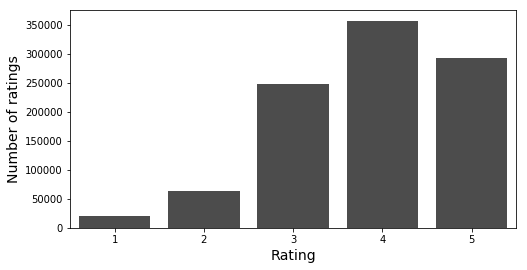

In [28]:
def plot_hist(ratings):
    plt.rcParams['figure.figsize'] = [8, 4]
    ax = sns.countplot(x='rating', data=ratings, color='#4c4c4c')
    ax.set_xlabel('Rating', fontsize=14)
    ax.set_ylabel('Number of ratings', fontsize=14)
    return
plot_hist(ratings)

In [29]:
#plt.rcParams['figure.figsize'] = [8, 4]
#books['ratings_count'].hist(bins = 30) 

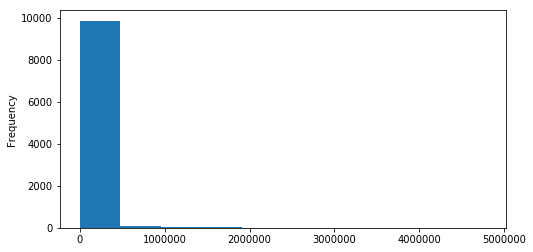

In [30]:
books.ratings_count.plot.hist()

In [31]:
#ax=ratings.rating.plot.hist()
#ax.set_xlabel('Overall Ratings', fontsize=13)
#ax.set_ylabel('Count of Ratings', fontsize=13)


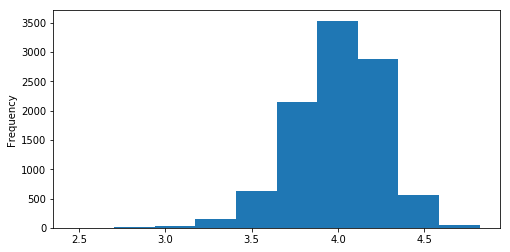

In [32]:
books.average_rating.plot.hist()


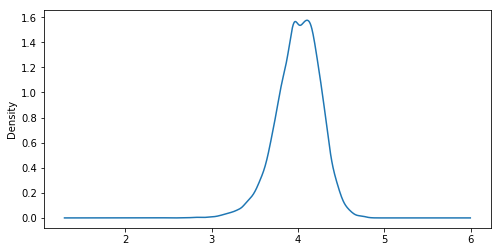

In [33]:
books.average_rating.plot.density() #We find that there are no outliers in our data

In [34]:
ratings['rating'].value_counts()

4    357366
5    292961
3    248623
2     63231
1     19575
Name: rating, dtype: int64

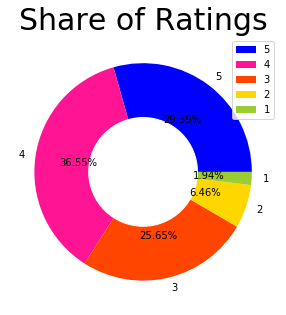

In [35]:
# making a donut chart to represent share of each ratings
size = [ 201538, 250628,175908, 44308, 13300]
colors = ['blue', 'deeppink', 'orangered',  'gold', 'yellowgreen']
labels = "5", "4", "3", "2", "1"

my_circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [36]:
#features = ['id', 'book_id', 'authors', 'title', 'average_rating', 'ratings_count']

In [37]:
#Many users have rated the same book more than once.
#So I will erase those duplicated ratings from the rating table.
#For those user-book pairs that have more than 1 rating I will then keep only one record
#which is the average of the given ratings.

In [38]:

a = ratings.groupby(['user_id', 'book_id'], as_index = False).count().sort_values('rating',ascending = False)
a.head()
#Here I find the users who have rated the same book more than once


,user_id,book_id,rating
59787,3204,8946,5
729574,38259,3996,4
11033,691,6472,4
665335,34548,7420,4
81315,4359,2515,4


In [39]:
# To double check if this is true: The same user has rated the same book 5 times
ratings[(ratings.user_id == 3204) & (ratings.book_id == 8946)]  

,book_id,user_id,rating
883706,8946,3204,5
883707,8946,3204,5
883708,8946,3204,5
883709,8946,3204,5
883710,8946,3204,4


In [40]:
#Here I calculate the rating mean per user and book, so that I can later replace the mean to the rating value
# and get rid of the duplicates rows

b= ratings.groupby(['user_id', 'book_id'], as_index = False).mean().round(0).sort_values('rating', ascending = False)
b.head()

,user_id,book_id,rating
489739,25094,6395,5.0
280452,14074,4053,5.0
280426,14074,1753,5.0
671540,34898,4929,5.0
280423,14074,1633,5.0


In [41]:
# Let's double check if it has worked or not:

b[(b.user_id == 3204) & (b.book_id == 8946)]  

,user_id,book_id,rating
59787,3204,8946,5.0


In [42]:
#Now I create a table grouped by user and book pair
#calculating mean and number of rating that a user has made for the same book

ratings['count'] = ratings['rating']

c = ratings.groupby(['user_id', 'book_id'], as_index = False) \
                   .agg({'rating' : 'mean', 'count' : 'count'}) \
                   .rename(columns = {'rating':'mean'}) \
                   .sort_values('count', ascending = False)



In [43]:
ratings = ratings.drop(['count'], axis = 1)
            

In [44]:
c['mean'] = c['mean'].round(0)
c.head()

,user_id,book_id,mean,count
59787,3204,8946,5.0,5
729574,38259,3996,5.0,4
11033,691,6472,5.0,4
665335,34548,7420,5.0,4
81315,4359,2515,5.0,4


In [45]:
# Now I append the mean and count per each user and book to the ratings table:

ratings = pd.merge(ratings, c, on = ['user_id', 'book_id'])
ratings.head()

,book_id,user_id,rating,mean,count
0,1,314,5,5.0,1
1,1,439,3,3.0,1
2,1,588,5,5.0,1
3,1,1169,4,4.0,1
4,1,1185,4,4.0,1


In [46]:
ratings.sort_values('count', ascending = False).head()

,book_id,user_id,rating,mean,count
883710,8946,3204,4,5.0,5
883706,8946,3204,5,5.0,5
883709,8946,3204,5,5.0,5
883708,8946,3204,5,5.0,5
883707,8946,3204,5,5.0,5


In [47]:
ratings.shape    

(981756, 5)

In [48]:
# We can now drop the duplicates records for the combination user/book with more than 1 rating
ratings = ratings.drop_duplicates(subset = ['book_id', 'user_id'], keep = 'first', inplace = False)\
                                  .sort_values('count', ascending = False)

In [49]:
ratings = ratings.drop(['rating', 'count'], axis = 1)

In [50]:
ratings.head()


,book_id,user_id,mean
883706,8946,3204,5.0
399011,3996,38259,5.0
883651,8946,42,5.0
883697,8946,2308,5.0
736954,7420,34548,5.0


In [51]:
ratings.shape  #After removing duplicate records

(979478, 3)

In [52]:
ratings.columns = ['book_id', 'user_id', 'rating']
# I restore the 'ratings' table column names as they were prior to the modification I have made

In [53]:
#To find what users have rated the maximum and minimum number of books

In [54]:
ratesPerUser = ratings[['user_id', 'rating']].groupby(['user_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'totalRatings'}) \
                      .sort_values('totalRatings', ascending = False)

ratesPerUser.head(5)

,user_id,totalRatings
12873,12874,200
30943,30944,200
52035,52036,199
12380,12381,199
28157,28158,199


In [55]:
ratesPerUser.tail()

,user_id,totalRatings
1157,1158,1
39656,39657,1
37044,37045,1
31451,31452,1
10716,10717,1


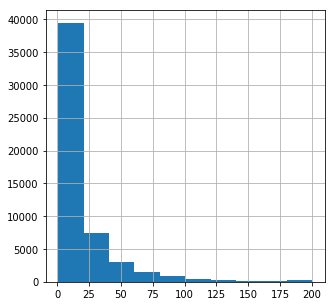

In [56]:
ratesPerUser.totalRatings.hist()

In [57]:
#The histogram above shows how many users have rated only 1 to 15 books.
#Considered that we are using only a subset (10k) of all the books listed in Goodreads,
#it will be pretty difficult to give accurate recommendation to users with that few ratings.
#Include only user that have rated at least 20 of the 10K books included in the analysis.

In [58]:
ratings = pd.merge(ratings, ratesPerUser, on = ['user_id'])

In [59]:
ratings.sort_values('totalRatings', ascending = False).head(5)

,book_id,user_id,rating,totalRatings
486526,81,12874,4.0,200
977600,1492,30944,4.0,200
977605,2209,30944,5.0,200
977604,2269,30944,5.0,200
977603,1431,30944,5.0,200


In [60]:
# Keeping only users with more than a 'minimum' of ratings
minimumRatings = ratings.totalRatings <= 60
np.sum(minimumRatings)

633962

In [61]:
ratings = ratings[-minimumRatings]
len(ratings)   # only 707,456 ratings have been kept

345516

In [62]:
len(ratings.user_id.unique())  # total of remaining users after removing the ones with less than the established minimum

3557

In [63]:
len(ratings.book_id.unique())  # total of remaining books after removing users with less than the established minimum

9871

In [64]:
ratings = ratings.drop('totalRatings', axis = 1)

Now I do the same thing but about the books: how many books have very few ratings?To avoid 'obscure' recommendations of books that only few users have read - to remove books with less than 30 ratings received.

In [65]:
ratesPerBook = ratings[['book_id', 'rating']].groupby(['book_id'], as_index = False) \
                      .count() \
                      .rename(columns = {'rating' : 'receivedRatings'}) \
                      .sort_values('receivedRatings', ascending = False)

ratesPerBook.tail()

,book_id,receivedRatings
7263,7314,1
7264,7315,1
7266,7317,1
9030,9126,1
8221,8297,1


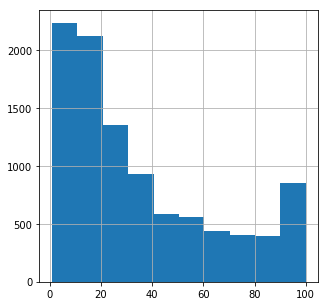

In [66]:
ratesPerBook.receivedRatings.hist()

In [67]:
ratings = pd.merge(ratings, ratesPerBook, on = ['book_id'])

In [68]:
# Keeping only books with more than a 'minimum' of ratings received

minimumReceived = ratings.receivedRatings < 50
np.sum(minimumReceived)

135858

In [69]:
ratings = ratings[-minimumReceived]
len(ratings)

209658

In [70]:
len(ratings.user_id.unique())   # total of remaining users


3533

In [71]:
len(ratings.book_id.unique())    # total of remaining books

2698

In [72]:
ratings.shape

(209658, 4)

In [73]:
ratings = ratings.drop('receivedRatings', axis = 1)

In [74]:
Tags = pd.merge(book_tags, tags, on = 'tag_id')
Tags.sort_values('goodreads_book_id').head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
258362,1,33165,338,youth
250046,1,17213,347,kindle
246919,1,27535,348,shelfari-favorites
245888,1,16799,351,juvenile


In [75]:

mostUsedTags = Tags.groupby(['tag_name'], as_index = False) \
                      .agg({'goodreads_book_id' : 'count'}) \
                      .rename(columns = {'goodreads_book_id' : 'number'}) \
                      .sort_values('number', ascending = False)
mostUsedTags.head()

,tag_name,number
30574,to-read,9983
11557,favorites,9881
22743,owned,9858
5207,books-i-own,9799
8717,currently-reading,9776


In [76]:
genres = pd.read_csv('genres.csv')
genres.head()

,Unnamed: 0,tag_name
0,0,art
1,1,biography
2,2,business
3,3,children-s
4,4,christian


In [77]:
genres.shape


(1235, 2)

In [78]:
genreList=genres['tag_name'].tolist()

In [79]:
genreTags = tags.loc[tags['tag_name'].isin(genreList)]  # 832 tags (of out the 1235) 
len(genreTags)

832

In [80]:
mostCommonTags = pd.merge(book_tags, genreTags, on = ['tag_id'])

In [81]:
stringedTags = mostCommonTags.groupby('goodreads_book_id')['tag_name'].apply(lambda x: "%s" % ' '.join(x)).reset_index()

In [82]:
stringedTags.head()

,goodreads_book_id,tag_name
0,1,fantasy young-adult fiction magic childrens ad...
1,2,fantasy young-adult fiction magic children-s n...
2,3,fantasy young-adult fiction magic childrens ad...
3,5,fantasy young-adult fiction magic childrens ad...
4,6,fantasy young-adult fiction childrens adventur...


In [83]:
#stringedTags=stringedTags.rename(columns={'goodreads_book_id':'book_id'})

In [84]:
stringedTags = pd.merge(stringedTags, books[['book_id', 'authors', 'title']], left_on = ['goodreads_book_id'], \
                       right_on = ['book_id']).drop('goodreads_book_id', axis = 1)

In [85]:
stringedTags.head()

,tag_name,book_id,authors,title
0,fantasy young-adult fiction magic childrens ad...,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...
1,fantasy young-adult fiction magic children-s n...,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...
2,fantasy young-adult fiction magic childrens ad...,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
3,fantasy young-adult fiction magic childrens ad...,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...
4,fantasy young-adult fiction childrens adventur...,6,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...


In [86]:
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))

In [87]:
stringedTags.head()

,tag_name,book_id,authors,title
0,fantasy young-adult fiction magic childrens ad...,1,"j.k.rowling,marygrandpré",Harry Potter and the Half-Blood Prince (Harry ...
1,fantasy young-adult fiction magic children-s n...,2,"j.k.rowling,marygrandpré",Harry Potter and the Order of the Phoenix (Har...
2,fantasy young-adult fiction magic childrens ad...,3,"j.k.rowling,marygrandpré",Harry Potter and the Sorcerer's Stone (Harry P...
3,fantasy young-adult fiction magic childrens ad...,5,"j.k.rowling,marygrandpré,rufusbeck",Harry Potter and the Prisoner of Azkaban (Harr...
4,fantasy young-adult fiction childrens adventur...,6,"j.k.rowling,marygrandpré",Harry Potter and the Goblet of Fire (Harry Pot...


In [88]:
stringedTags['authors'] = stringedTags['authors'].astype('str').apply(lambda x: str.lower(x.replace(",", " ")))

In [90]:
stringedTags.head()

,tag_name,book_id,authors,title
0,fantasy young-adult fiction magic childrens ad...,1,j.k.rowling marygrandpré,Harry Potter and the Half-Blood Prince (Harry ...
1,fantasy young-adult fiction magic children-s n...,2,j.k.rowling marygrandpré,Harry Potter and the Order of the Phoenix (Har...
2,fantasy young-adult fiction magic childrens ad...,3,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...
3,fantasy young-adult fiction magic childrens ad...,5,j.k.rowling marygrandpré rufusbeck,Harry Potter and the Prisoner of Azkaban (Harr...
4,fantasy young-adult fiction childrens adventur...,6,j.k.rowling marygrandpré,Harry Potter and the Goblet of Fire (Harry Pot...


In [91]:
stringedTags['all_tags'] = stringedTags['tag_name'] + " " + stringedTags['authors']

In [134]:
stringedTags=stringedTags.drop('tag_name', axis = 1)
stringedTags.head()

,book_id,authors,title,all_tags
0,1,j.k.rowling marygrandpré,Harry Potter and the Half-Blood Prince (Harry ...,fantasy young-adult fiction magic childrens ad...
1,2,j.k.rowling marygrandpré,Harry Potter and the Order of the Phoenix (Har...,fantasy young-adult fiction magic children-s n...
2,3,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...,fantasy young-adult fiction magic childrens ad...
3,5,j.k.rowling marygrandpré rufusbeck,Harry Potter and the Prisoner of Azkaban (Harr...,fantasy young-adult fiction magic childrens ad...
4,6,j.k.rowling marygrandpré,Harry Potter and the Goblet of Fire (Harry Pot...,fantasy young-adult fiction childrens adventur...


In [92]:
stringedTags.all_tags[1]

'fantasy young-adult fiction magic children-s novels paranormal teen witches urban-fantasy supernatural mystery wizards juvenile romance coming-of-age science-fiction-fantasy boarding-school action british-literature young-adult-fantasy j.k.rowling marygrandpré'

In [93]:
#a=stringedTags.all_tags[10]
#import nltk
#s = nltk.word_tokenize(a)
#s

In [94]:
#stringedTags = pd.merge( stringedTags, ratings, on = ['book_id'])
#stringedTags.head(10)

In [95]:
#Now that we have obtained the combined strings,
#we can now feed these strings to a CountVectorizer() object for getting the count matrix.

In [96]:
#creating new CountVectorizer() object
cv = CountVectorizer()


In [97]:
#feeding combined strings(all_tags) to CountVectorizer() object
count_matrix = cv.fit_transform(stringedTags["all_tags"])
count_matrix

<10000x26750 sparse matrix of type '<class 'numpy.int64'>'
	with 509529 stored elements in Compressed Sparse Row format>

In [98]:
#Now, we need to obtain the cosine similarity matrix from the count matrix.
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.7643608 , 0.92288947, ..., 0.27508955, 0.21854335,
        0.22239287],
       [0.7643608 , 1.        , 0.71674754, ..., 0.26169537, 0.21271497,
        0.19981092],
       [0.92288947, 0.71674754, 1.        , ..., 0.18654789, 0.1717795 ,
        0.17928749],
       ...,
       [0.27508955, 0.26169537, 0.18654789, ..., 1.        , 0.25668451,
        0.27820744],
       [0.21854335, 0.21271497, 0.1717795 , ..., 0.25668451, 1.        ,
        0.77234329],
       [0.22239287, 0.19981092, 0.17928749, ..., 0.27820744, 0.77234329,
        1.        ]])

In [99]:
#stringedTags = stringedTags.reset_index()
#bookTitles = stringedTags['title']
#indices = pd.Series(stringedTags.index, index = bookTitles)

In [100]:
bookTitles = stringedTags['title']
indices = pd.Series(stringedTags.index, index = bookTitles)
def topRecommendations(title):
    index = indices[title]
    similarityScore = list(enumerate(cosine_sim[index]))
    similarityScore = sorted(similarityScore, key = lambda x: x[1], reverse = True)
    similarityScore = similarityScore[1:10]
    bookIndex = [i[0] for i in similarityScore]
    return bookTitles.iloc[bookIndex]

In [145]:
topRecommendations('Tuesdays with Morrie').head(10)

5869     Have a Little Faith: a True Story
623                       The Glass Castle
899                       For One More Day
953                        This Boy's Life
2474    I Never Promised You a Rose Garden
Name: title, dtype: object

In [102]:
topRecommendations('Harry Potter and the Half-Blood Prince (Harry Potter, #6)').head(10)

3890    Harry Potter and the Deathly Hallows (Harry Po...
2       Harry Potter and the Sorcerer's Stone (Harry P...
1276    Harry Potter and the Chamber of Secrets (Harry...
4       Harry Potter and the Goblet of Fire (Harry Pot...
5686             Harry Potter Boxset (Harry Potter, #1-7)
3       Harry Potter and the Prisoner of Azkaban (Harr...
3488    The Harry Potter Collection 1-4 (Harry Potter,...
5891    Harry Potter and the Order of the Phoenix (Har...
5       Harry Potter Boxed Set, Books 1-5 (Harry Potte...
Name: title, dtype: object

In [103]:
topRecommendations('East of Eden').head(10)

326              The Grapes of Wrath
355     The Winter of Our Discontent
714                     The Red Pony
289               The Sun Also Rises
405           The Catcher in the Rye
198            To Kill a Mockingbird
87                   Of Mice and Men
1370                      My Ántonia
356                      Cannery Row
Name: title, dtype: object

In [150]:
topRecommendations('Animal Farm').head(10)

475     Animal Farm / 1984
409        Brave New World
474                   1984
1630              The Dead
636      Lord of the Flies
325         Fahrenheit 451
6610           The Lottery
350       The Great Gatsby
2685          Silas Marner
Name: title, dtype: object

In [105]:
ratings1= pd.merge(ratings, books[['id', 'title']], left_on = ['book_id'], right_on = ['id'])

In [151]:
ratings1.shape

(209658, 5)

In [106]:
userBookTable= pd.pivot_table(ratings1, index = ['user_id'], columns = ['title'], values = ['rating'])
userBookTable

rating                           \
title   'Salem's Lot 'Tis (Frank McCourt, #2)   
user_id                                         
7                NaN                      NaN   
35               NaN                      NaN   
41               NaN                      NaN   
143              NaN                      NaN   
153              NaN                      NaN   
173              NaN                      NaN   
178              NaN                      NaN   
215              NaN                      NaN   
230              NaN                      NaN   
244              NaN                      NaN   
274              NaN                      NaN   
284              NaN                      NaN   
307              NaN                      NaN   
314              NaN                      NaN   
319              NaN                      NaN   
324              NaN                      NaN   
341              NaN                      NaN   
343              NaN                      NaN   
363              NaN                      NaN   
368              NaN                      NaN   
376              NaN                      NaN   
424              NaN                      NaN   
425              NaN                      NaN   
430              NaN                      NaN   
439              NaN                      NaN   
446              NaN                      NaN   
461              NaN                      NaN   
577              NaN                      NaN   
588              NaN                      NaN   
589              NaN                      NaN   
...              ...                      ...   
53072            NaN                      NaN   
53073            NaN                      NaN   
53074            NaN                      NaN   
53075            NaN                      NaN   
53076            NaN                      NaN   
53077            NaN                      NaN   
53078            NaN                      NaN   
53079            NaN                      NaN   
53080            NaN                      NaN   
53081            NaN                      NaN   
53083            NaN                      NaN   
53107            NaN                      NaN   
53130            NaN                      NaN   
53131            NaN                      NaN   
53145            NaN                      NaN   
53165            NaN                      NaN   
53173            NaN                      NaN   
53174            NaN                      NaN   
53182            NaN                      NaN   
53183            NaN                      NaN   
53204            NaN                      NaN   
53218            NaN                      NaN   
53245            3.5                      NaN   
53279            NaN                      NaN   
53281            NaN                      NaN   
53292            NaN                      NaN   
53293            NaN                      NaN   
53318            NaN                      NaN   
53366            NaN                      NaN   
53373            NaN                      NaN   

                                                              \
title   10th Anniversary (Women's Murder Club, #10) 11/22/63   
user_id                                                        
7                                               NaN      NaN   
35                                              NaN      NaN   
41                                              NaN      NaN   
143                                             NaN      NaN   
153                                             NaN      NaN   
173                                             NaN      NaN   
178                                             NaN      NaN   
215                                             NaN      NaN   
230                                             NaN      NaN   
244                                             NaN      NaN   
274                                          

In [107]:
userBookTable.shape

(3533, 2697)

In [108]:
userBookTable.columns = userBookTable.columns.droplevel(0)

In [109]:
corrMatrix = userBookTable.corr(method = 'pearson', min_periods = 25)

In [110]:
corrMatrix

title,'Salem's Lot,"'Tis (Frank McCourt, #2)","10th Anniversary (Women's Murder Club, #10)",11/22/63,"11th Hour (Women's Murder Club, #11)",1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",...,"Y: The Last Man, Vol. 1: Unmanned",Year of Wonders,Yertle the Turtle and Other Stories,Yes Please,"You Suck (A Love Story, #2)",You've Been Warned,Zeitoun,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values,"Zero Day (John Puller, #1)",god is Not Great: How Religion Poisons Everything
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,1.000000,NaN,NaN,0.681683,NaN,NaN,NaN,NaN,NaN,-0.064194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'Tis (Frank McCourt, #2)",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"10th Anniversary (Women's Murder Club, #10)",NaN,NaN,1.000000,NaN,0.829614,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/22/63,0.681683,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"11th Hour (Women's Murder Club, #11)",NaN,NaN,0.829614,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1Q84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1st to Die (Women's Murder Club, #1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
def newRecommendations(title):
    bookRating = corrMatrix[[title]][:]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    a= df.head(10)
    a=str(a)
    return a

In [179]:
print(newRecommendations('1984'))

title                                                   1984
title                                                       
Animal Farm                                         0.709390
One Hundred Years of Solitude                       0.592153
The Cider House Rules                               0.584201
Eat, Pray, Love                                     0.573611
In Cold Blood                                       0.571231
The Stranger                                        0.570599
The Iliad                                           0.557305
Siddhartha                                          0.554008
The Pillars of the Earth (The Kingsbridge Serie...  0.553912
Moby-Dick or, The Whale                             0.546340


In [152]:
newRecommendations('Animal Farm')

title,Animal Farm
title,
1984,0.709390
And Then There Were None,0.643743
"The Fellowship of the Ring (The Lord of the Rings, #1)",0.616264
A Farewell to Arms,0.614318
The Book Thief,0.595431
Brave New World,0.569839
The Pearl,0.568295
Gulliver's Travels,0.568156
Catch-22,0.547091


In [114]:
newRecommendations('Harry Potter and the Half-Blood Prince (Harry Potter, #6)')

title,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)"
title,
"Harry Potter and the Goblet of Fire (Harry Potter, #4)",0.840719
"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",0.797188
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",0.783376
"Harry Potter and the Deathly Hallows (Harry Potter, #7)",0.709126
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",0.648240
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",0.645615
"Are You There God? It's Me, Margaret",0.588822
"The Firm (Penguin Readers, Level 5)",0.544184
"The Hunger Games (The Hunger Games, #1)",0.514796


# ---------------------------------------------------------------------------------------------------------------

In [115]:
#userBookTable.iloc[7].dropna() #books read by a particular user user id 7

In [116]:
"""user_corr=pd.Series()
user_id=7
for book in userBookTable.iloc[user_id].dropna().index:
    corr_list=corrMatrix[book].dropna()*userBookTable.iloc[user_id][book]
    user_corr=user_corr.append(corr_list)"""

'user_corr=pd.Series()\nuser_id=7\nfor book in userBookTable.iloc[user_id].dropna().index:\n    corr_list=corrMatrix[book].dropna()*userBookTable.iloc[user_id][book]\n    user_corr=user_corr.append(corr_list)'

In [117]:
"""def newRecommendations1(user_id,title):
    corr_list=userBookTable.iloc[user_id][title]
    bookRating = bookRating.dropna()
    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]
    return df.head(10)"""

'def newRecommendations1(user_id,title):\n    corr_list=userBookTable.iloc[user_id][title]\n    bookRating = bookRating.dropna()\n    df = pd.DataFrame(bookRating.sort_values(by = title, ascending = False))[1:]\n    return df.head(10)'

In [118]:
#newRecommendations1(7,American Wife)

In [119]:
import  pickle

In [120]:
pickle.dump(cosine_sim,open("pickleFile1.pkl","wb"))

In [121]:
s=pickle.load(open("pickleFile1.pkl","rb"))

In [122]:
s

array([[1.        , 0.7643608 , 0.92288947, ..., 0.27508955, 0.21854335,
        0.22239287],
       [0.7643608 , 1.        , 0.71674754, ..., 0.26169537, 0.21271497,
        0.19981092],
       [0.92288947, 0.71674754, 1.        , ..., 0.18654789, 0.1717795 ,
        0.17928749],
       ...,
       [0.27508955, 0.26169537, 0.18654789, ..., 1.        , 0.25668451,
        0.27820744],
       [0.21854335, 0.21271497, 0.1717795 , ..., 0.25668451, 1.        ,
        0.77234329],
       [0.22239287, 0.19981092, 0.17928749, ..., 0.27820744, 0.77234329,
        1.        ]])

In [123]:
bookTitles = stringedTags['title']
indices = pd.Series(stringedTags.index, index = bookTitles)

In [124]:
bookTitles = stringedTags['title']
indices = pd.Series(stringedTags.index, index = bookTitles)
def topRecommendations(title):
    index = indices[title]
    similarityScore = list(enumerate(cosine_sim[index]))
    similarityScore = sorted(similarityScore, key = lambda x: x[1], reverse = True)
    similarityScore = similarityScore[1:10]
    bookIndex = [i[0] for i in similarityScore]
    return bookTitles.iloc[bookIndex]


In [125]:
pickle.dump(bookTitles,open("pickleFile2.pkl","wb"))

In [126]:
t=pickle.load(open("pickleFile2.pkl","rb"))

In [127]:
pickle.dump(stringedTags,open("pickleFile3.pkl","wb"))

In [128]:
u=pickle.load(open("pickleFile3.pkl","rb"))

In [129]:
pickle.dump(topRecommendations,open("fun.pkl","wb"))

In [130]:
recommendations=pickle.load(open("fun.pkl","rb"))

In [153]:
pickle.dump(corrMatrix,open("pickleNew.pkl","wb"))

In [154]:
u=pickle.load(open("pickleNew.pkl","rb"))